In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import warnings

# Suppress minor warnings for a cleaner notebook
warnings.filterwarnings("ignore")

# Make matplotlib plots display beautifully in the notebook
%matplotlib inline

In [2]:
# Load the NetCDF file from the data folder
file_path = "data/combined_final.nc"
ds = xr.open_dataset(file_path)

# In a Jupyter notebook, simply typing the variable name at the end 
# of a cell will render a beautiful interactive HTML summary of the NetCDF!
ds

<xarray.Dataset> Size: 254kB
Dimensions:              (y: 60, x: 53, time: 4)
Coordinates:
    lat                  (y, x) float64 25kB ...
    lon                  (y, x) float64 25kB ...
  * time                 (time) datetime64[ns] 32B 2025-01-07T20:00:00 ... 20...
    step                 timedelta64[ns] 8B ...
    heightAboveGround    float64 8B ...
    valid_time           datetime64[ns] 8B ...
    gribfile_projection  float64 8B ...
Dimensions without coordinates: y, x
Data variables:
    u10                  (y, x) float32 13kB ...
    v10                  (y, x) float32 13kB ...
    t2m                  (y, x) float32 13kB ...
    d2m                  (y, x) float32 13kB ...
    rave_frp             (time, y, x) float32 51kB ...
    rave_pm25            (time, y, x) float32 51kB ...
    rave_pm25_scaled     (time, y, x) float32 51kB ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP
    model:                   hrrr
    product:                 sfc
    description:             High-Resolution Rapid Refresh - CONUS
    remote_grib:             https://noaa-hrrr-bdp-pds.s3.amazonaws.com/hrrr....
    local_grib:              /mnt/c/users/alex/desktop/lab/labfetch/data/hrrr...
    search:                  TMP:2 m|DPT:2 m|UGRD:10 m|VGRD:10 m|PBLH|PRES:sfc

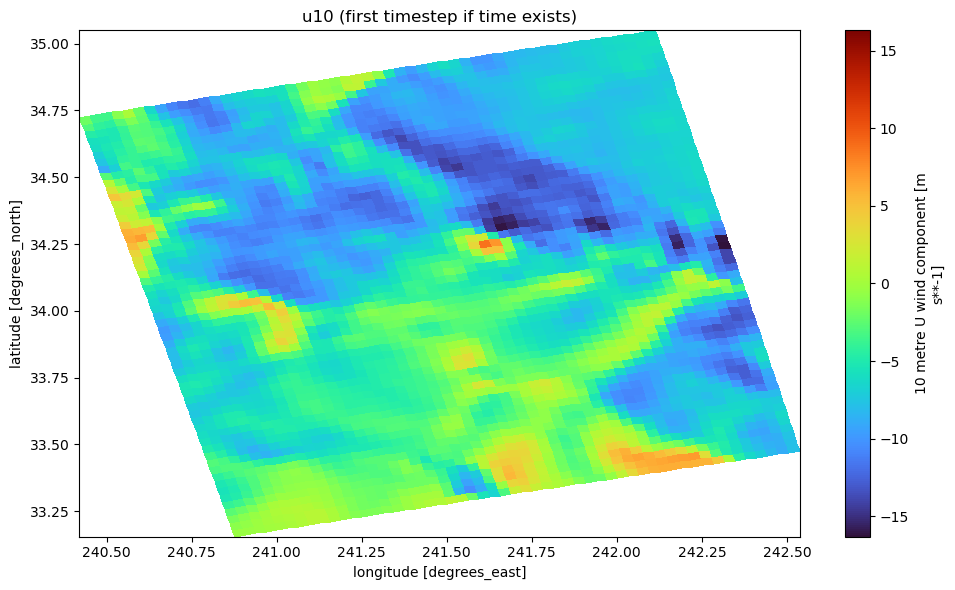

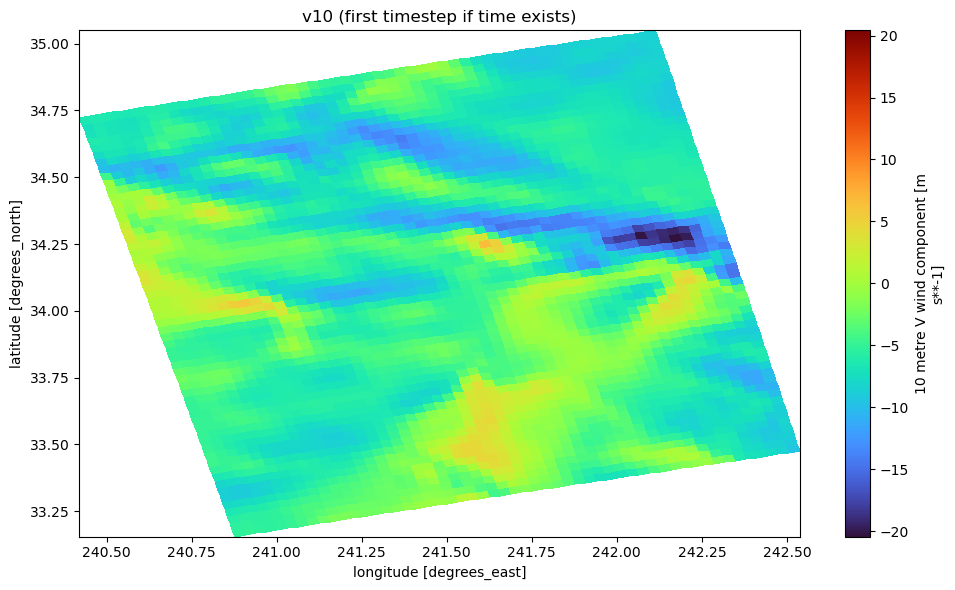

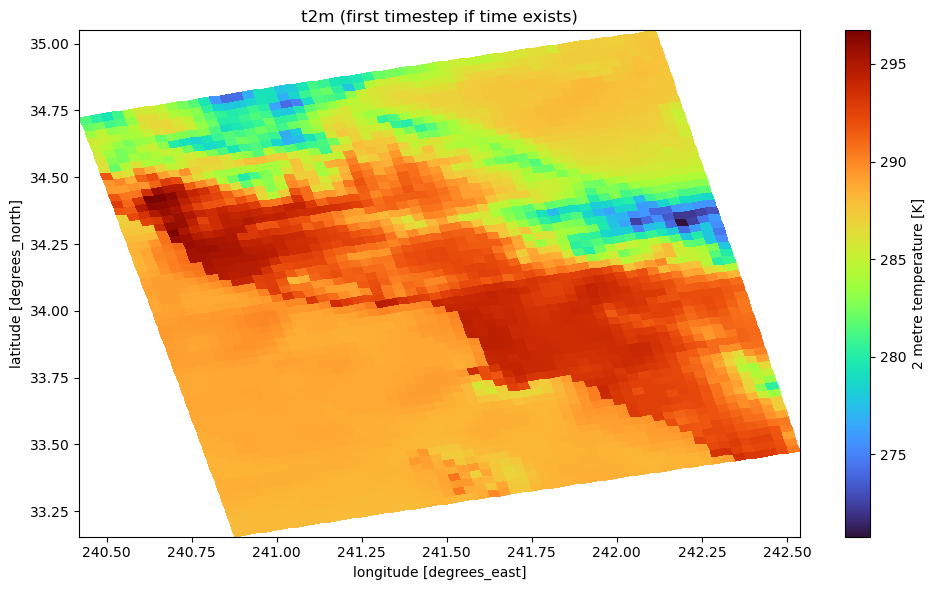

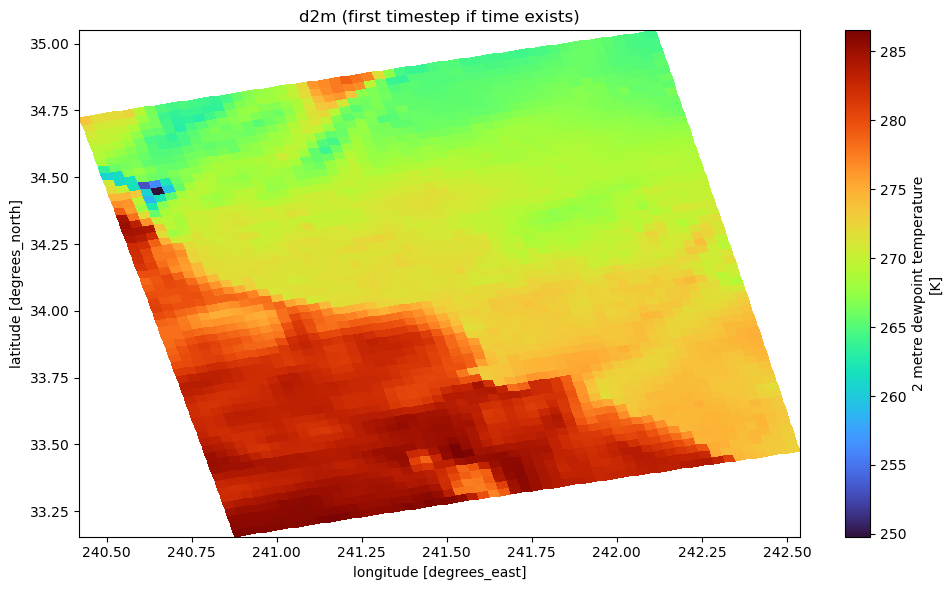

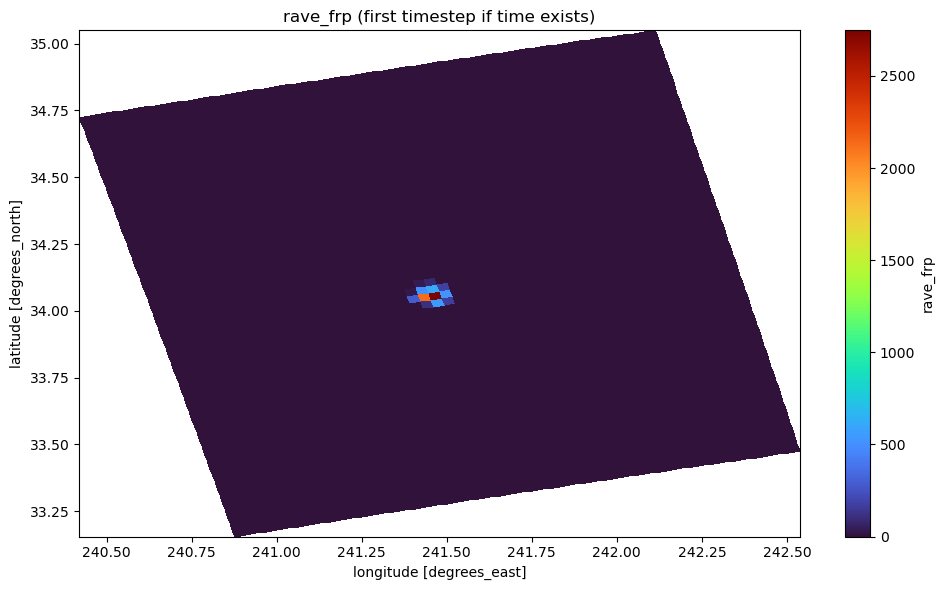

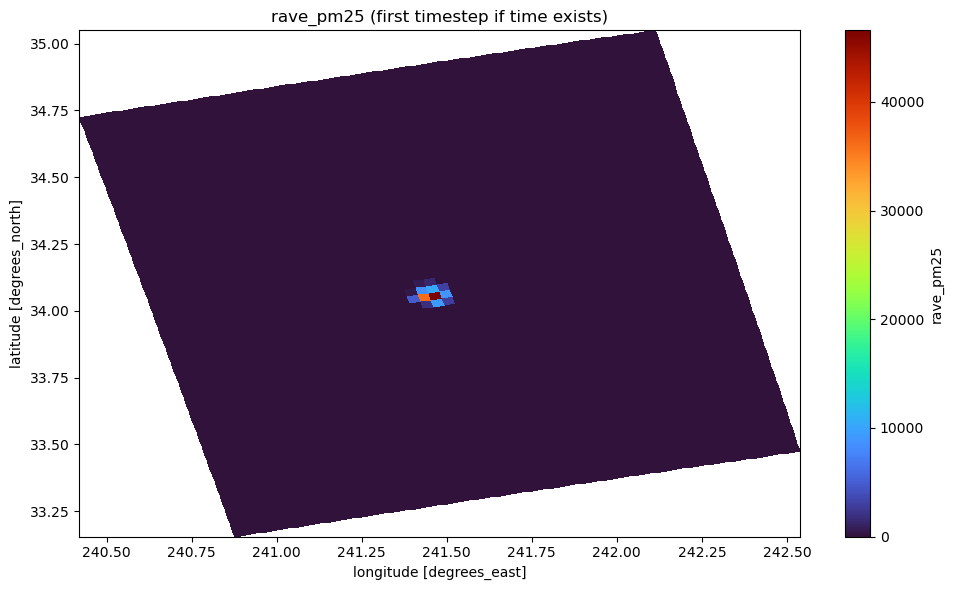

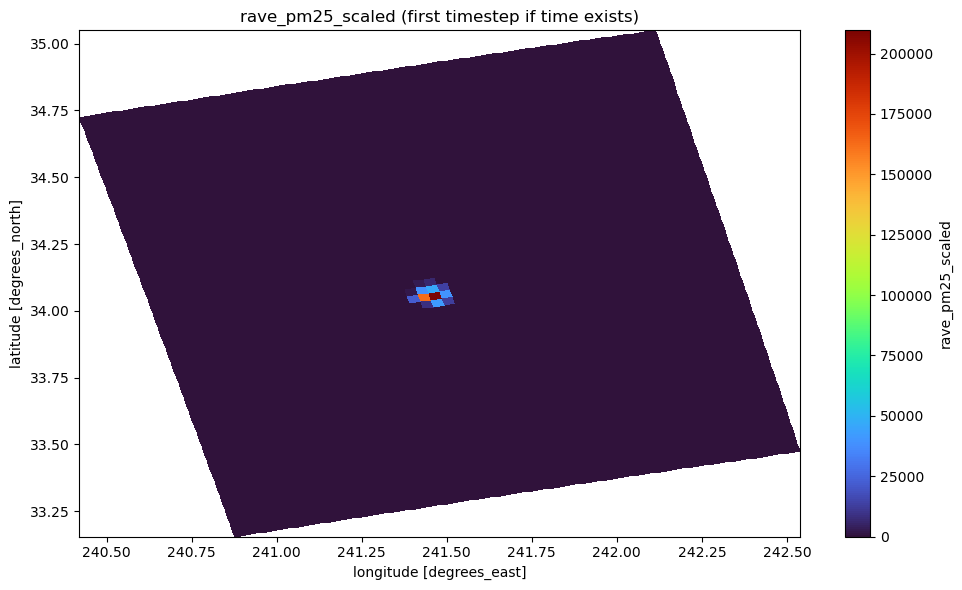

In [3]:
vars_to_plot = list(ds.data_vars)

for var in vars_to_plot:
    
    data = ds[var]
    
    # Handle time dimension if present
    if "time" in data.dims:
        plot_data = data.isel(time=0)
    else:
        plot_data = data
    
    fig, ax = plt.subplots(figsize=(10,6))
    
    plot_data.plot(
        ax=ax,
        x="lon",
        y="lat",
        cmap="turbo"
    )
    
    ax.set_title(f"{var} (first timestep if time exists)")
    
    plt.tight_layout()
    plt.show()

--- Plotting Evolution of rave_frp ---


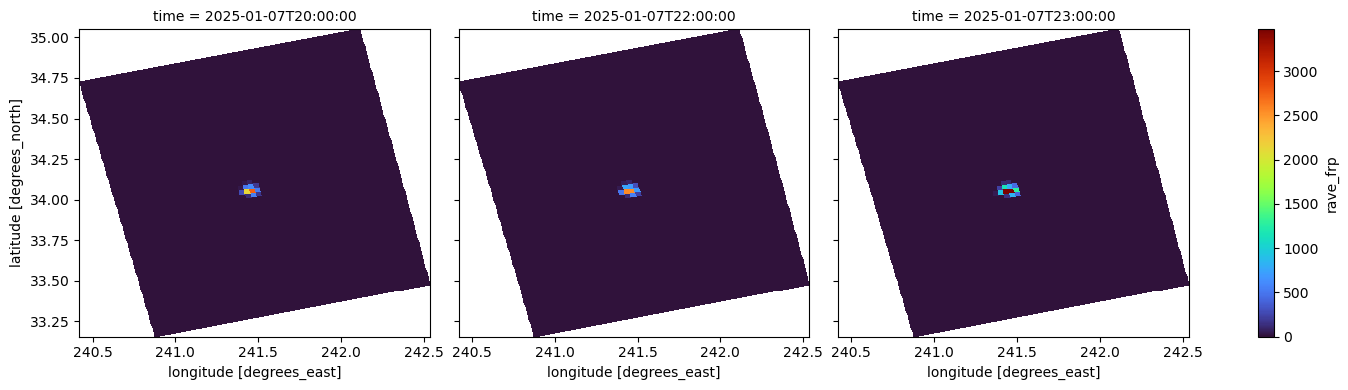

--- Plotting Evolution of rave_pm25 ---


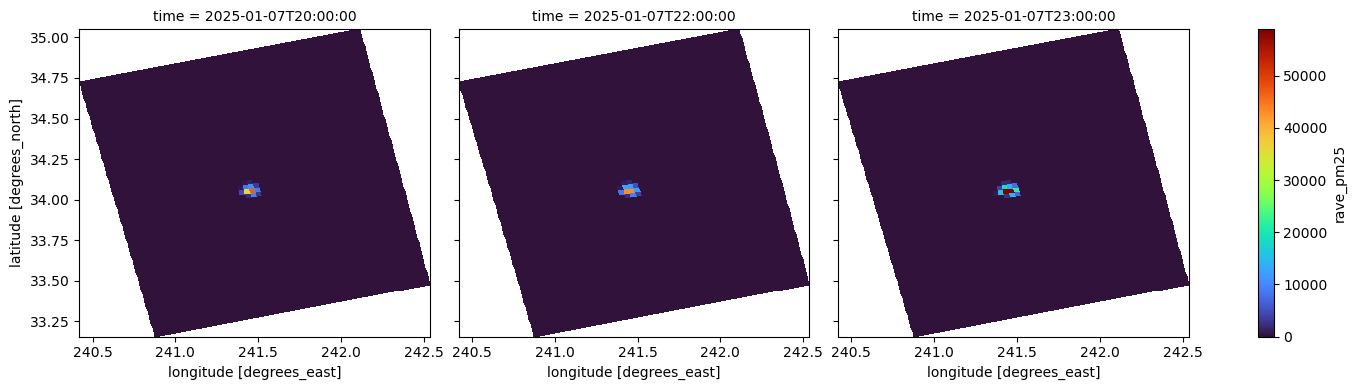

--- Plotting Evolution of rave_pm25_scaled ---


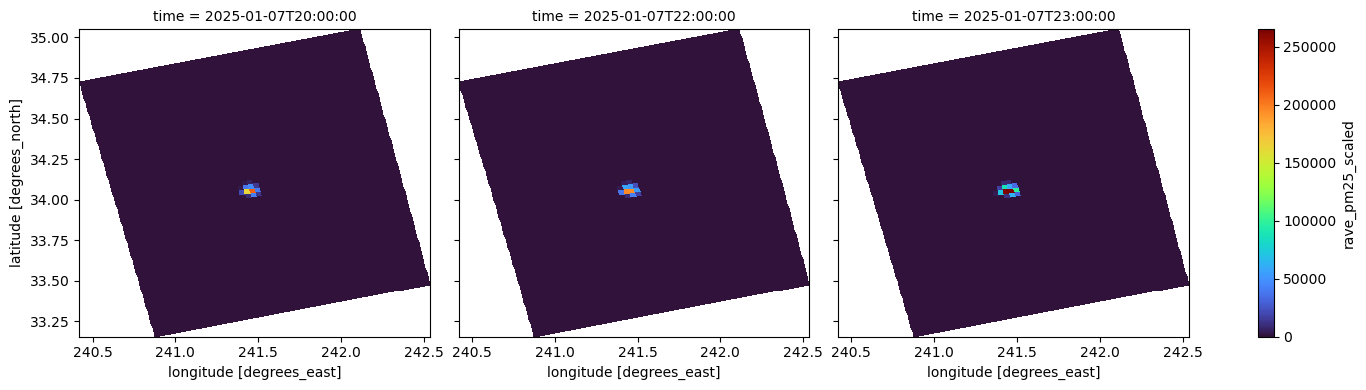

In [4]:
# 1. Pick specific time indices (e.g., First, Middle, Last)
# This ensures you see the beginning, peak, and end of your range
indices = [0, len(ds.time)//2, len(ds.time)-1]

# 2. Select specific variables to check (don't plot static grids like lat/lon)
target_vars = ["rave_frp", "rave_pm25", "rave_pm25_scaled", "TMP_2m"]

for var in target_vars:
    if var not in ds: continue
        
    print(f"--- Plotting Evolution of {var} ---")
    
    # Select the specific times and plot them in a row (col="time")
    subset = ds[var].isel(time=indices)
    
    subset.plot(
        col="time",
        col_wrap=3,
        x="lon", 
        y="lat",
        cmap="turbo",
        robust=False,
        figsize=(15, 4)
    )
    plt.show()